In [1]:
import polars as pl
from matplotlib import pyplot as plt

from cci.utils import project_dir

In [2]:
res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_full_fixed/130"  # 1N
title = "Full"
res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_full_fixed/28"  # 2N
res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_full_fixed/121"  # 3N
# res_dir = project_dir() / "results/CNN_bigger_kernel_full_fixed/160"

# res_dir = project_dir() / "results/CNN_bigger_kernel_pr_fixed/102"
# title = "PR"
# res_dir = project_dir() / "results/CNN_bigger_kernel_as_fixed/151"
# title = "AS"
# res_dir = project_dir() / "results/CNN_bigger_kernel_pe_fixed/6"
# title = "PE"
# res_dir = project_dir() / "results/CNN_bigger_kernel_vft_fixed/196"
# title = "VF/VT"

# res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_pr_fixed/171"
# title = "PR"
# res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_as_fixed/64"
# title = "AS"
# res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_pe_fixed/141"
# title = "PE"
# res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_vft_fixed/180"
# title = "VF/VT"

In [3]:
def get_df(group) -> pl.DataFrame:
    df = pl.read_csv(res_dir / f"0_{group}.csv").with_columns(
        pl.lit(0).alias("fold"),
        pl.lit(group).alias("group"),
        pl.lit(f"{group}_0").alias("identifier"),
    )

    try:
        for i in range(1, 5):
            df = df.vstack(
                pl.read_csv(res_dir / f"{i}_{group}.csv").with_columns(
                    pl.lit(i).alias("fold"),
                    pl.lit(group).alias("group"),
                    pl.lit(f"{group}_{i}").alias("identifier"),
                )
            )
    except:
        pass

    return df


df = get_df("train")

df = df.vstack(get_df("val"))
df

epoch,acc,loss,f1,auroc,precision,recall,specificity,bac,TP,FP,FN,TN,fold,group,identifier
i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i32,str,str
1,0.520052,0.240842,0.637341,0.550273,0.846753,0.510972,0.562963,0.536967,76,59,312,326,0,"""train""","""train_0"""
2,0.518758,0.240881,0.628743,0.569558,0.865385,0.49373,0.637037,0.565384,86,49,323,315,0,"""train""","""train_0"""
3,0.636481,0.235428,0.751986,0.609329,0.860606,0.667712,0.488889,0.5783,66,69,212,426,0,"""train""","""train_0"""
4,0.624838,0.239852,0.745614,0.577522,0.846614,0.666144,0.42963,0.547887,58,77,213,425,0,"""train""","""train_0"""
5,0.517464,0.239814,0.627373,0.573099,0.865014,0.492163,0.637037,0.5646,86,49,324,314,0,"""train""","""train_0"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
202,0.725118,0.797331,0.81761,0.783492,0.909091,0.742857,0.638889,0.690873,23,13,45,130,4,"""val""","""val_4"""
203,0.748815,0.681746,0.840841,0.774603,0.886076,0.8,0.5,0.65,18,18,35,140,4,"""val""","""val_4"""
204,0.748815,0.943836,0.836923,0.773809,0.906667,0.777143,0.611111,0.694127,22,14,39,136,4,"""val""","""val_4"""


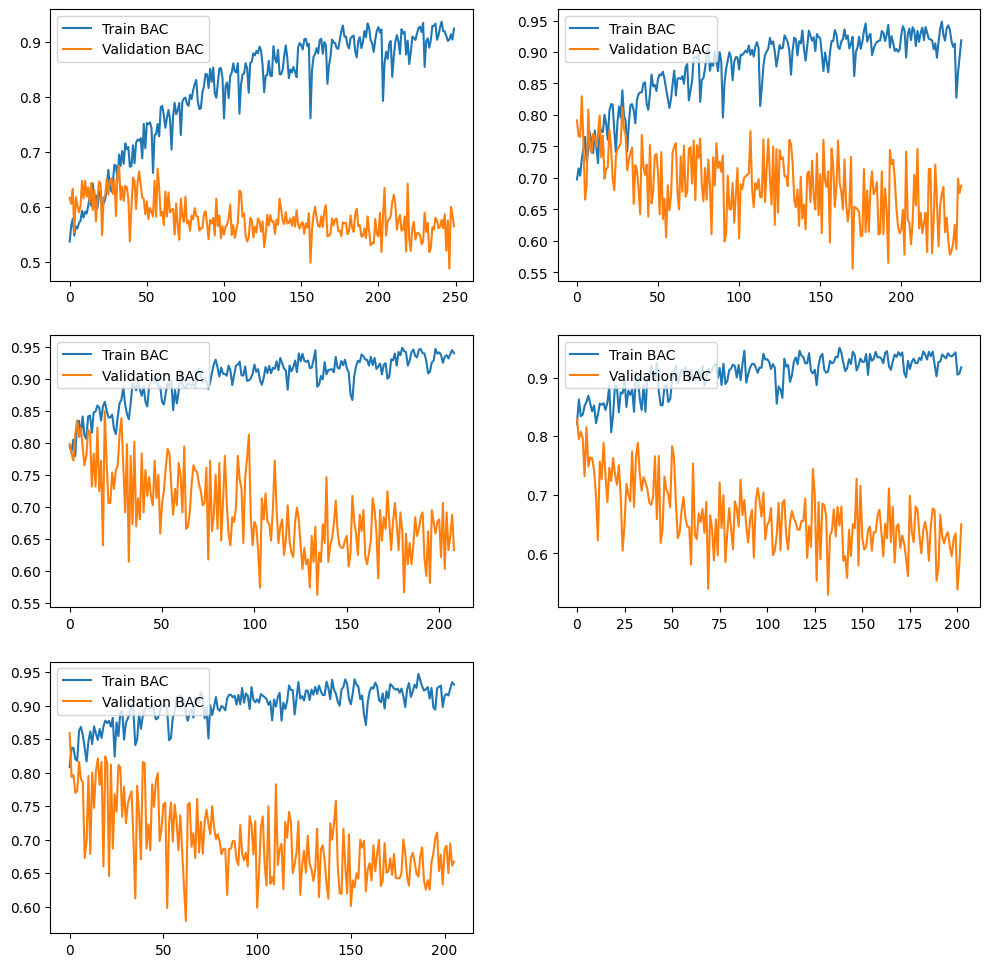

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax = ax.ravel()
for i, a in enumerate(ax):
    train = df.filter(pl.col("identifier") == f"train_{i}")
    val = df.filter(pl.col("identifier") == f"val_{i}")
    train_bac = train.select("bac").to_numpy()
    val_bac = val.select("bac").to_numpy()
    a.plot(train_bac, label="Train BAC")
    a.plot(val_bac, label="Validation BAC")
    # plt.title(f"Training history - {title}")
    a.legend()
    if len(val_bac) == 0:
        a.set_visible(False)


plt.savefig(res_dir / "bac.png")

In [41]:
# import numpy as np
# import seaborn as sns

# test_df = pl.read_csv(res_dir / "*_test.csv").drop("epoch")
# test_df

# for i, (tp, fp, fn, tn) in enumerate(test_df.select(["TP", "FP", "FN", "TN"]).rows()):
#     cm = np.array([[tp, fp], [fn, tn]]).astype("float")
#     normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
#     ax = sns.heatmap(
#         normalized_cm,
#         annot=True,
#         linewidths=0.01,
#         cmap="Oranges",
#         linecolor="gray",
#         vmin=0.0,
#         vmax=1.0,
#     )
#     ax.xaxis.set_ticklabels(["Good", "Bad"])
#     ax.yaxis.set_ticklabels(["Good", "Bad"])
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.title(f"{title} - {i}")
#     plt.savefig(res_dir / f"conf_{i}.png")
#     plt.close()

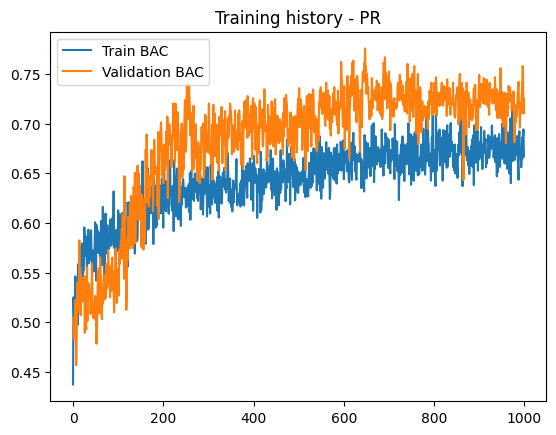

In [42]:
train = df.filter(pl.col("identifier") == "train_0")
val = df.filter(pl.col("identifier") == "val_0")
train_bac = train.select("bac").to_numpy()
val_bac = val.select("bac").to_numpy()

plt.plot(train_bac, label="Train BAC")
plt.plot(val_bac, label="Validation BAC")

plt.title(f"Training history - {title}")
plt.legend(loc="upper left")
plt.savefig(res_dir / "bac.png")

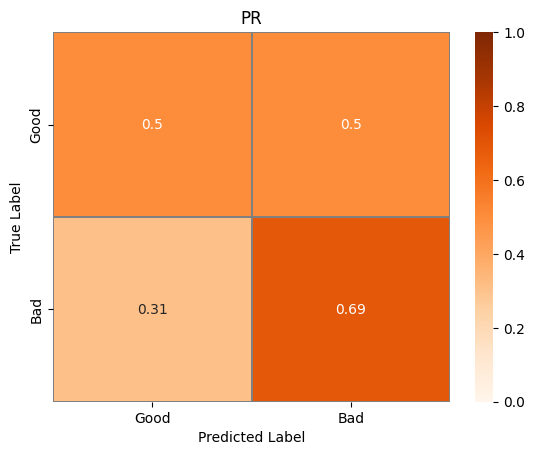

In [43]:
import numpy as np
import seaborn as sns

test_df = pl.read_csv(res_dir / "*_test.csv").drop("epoch")
test_df
for tp, fp, fn, tn in test_df.select(["TP", "FP", "FN", "TN"]).rows():
    cm = np.array([[tp, fp], [fn, tn]]).astype("float")
    normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(
        normalized_cm,
        annot=True,
        linewidths=0.01,
        cmap="Oranges",
        linecolor="gray",
        vmin=0.0,
        vmax=1.0,
    )
    ax.xaxis.set_ticklabels(["Good", "Bad"])
    ax.yaxis.set_ticklabels(["Good", "Bad"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.savefig(res_dir / "conf.png")